In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parse blat_DNMT.psl

In [12]:
dd = pd.read_csv('blat_DNMT.psl', sep='\t', header=0)

In [13]:
dd = dd.rename(index=str, columns={'mis- ': 'mismatch', 'rep. ': 'repmatch', 'Q gap':"Q gap count", "Q gap.1":"Q gap bases",
                             "T gap":"T gap count", "T gap.1":"T gap bases", "Q        ":"Q name", 
                             "Q   ":"Q size", "Q    ":"Q start", "Q  ":"Q end", "T        ":"T name",
                             "T   ":"T size", "T    ":"T start", "T  ":"T end", "block":"block count",
                             "blockSizes ":"blockSizes", ' tStarts':'tStarts'})

In [14]:
dd = dd.drop(dd.index[[0]])
dd = dd.reset_index()
dd[['index',
 'match',
 'mismatch',
 'repmatch',
 "N's",
 'Q gap count',
 'Q gap bases',
 'T gap count',
 'T gap bases',
 'Q size',
 'Q start',
 'Q end',
 'T size',
 'T start',
 'T end',
 'block count']] = dd[['index',
 'match',
 'mismatch',
 'repmatch',
 "N's",
 'Q gap count',
 'Q gap bases',
 'T gap count',
 'T gap bases',
 'Q size',
 'Q start',
 'Q end',
 'T size',
 'T start',
 'T end',
 'block count']].astype(int)

In [38]:
print(dd.shape)
dd.head()

(25322, 22)


,index,match,mismatch,repmatch,N's,Q gap count,Q gap bases,T gap count,T gap bases,strand,...,Q start,Q end,T name,T size,T start,T end,block count,blockSizes,qStarts,tStarts
0,1,262,1,0,0,2,2,6,1295,+,...,16,281,NG_029465.2:5001-114630,109630,106809,108367,9,"7,5,31,31,19,27,78,59,6,","16,24,30,61,92,111,138,216,275,","106809,106816,106821,106853,108170,108190,1082..."
1,2,305,0,0,0,1,1,5,1291,+,...,18,324,NG_029465.2:5001-114630,109630,106809,108405,7,"72,38,12,72,19,11,81,","18,90,128,140,212,232,243,","106809,108168,108207,108220,108293,108312,108324,"
2,3,152,11,0,0,2,23,3,25891,+,...,66,252,NG_029465.2:5001-114630,109630,9080,35134,4,"12,38,89,24,","66,99,139,228,","9080,9116,9158,35110,"
3,4,150,11,0,0,2,7,4,10777,-,...,74,242,NG_029465.2:5001-114630,109630,88501,99439,5,"73,29,39,7,13,","68,141,173,216,223,","88501,99341,99375,99415,99426,"
4,5,32,0,0,0,0,0,0,0,-,...,212,244,NG_029465.2:5001-114630,109630,80382,80414,1,"32,","66,","80382,"


In [19]:
list(dd)

['index',
 'match',
 'mismatch',
 'repmatch',
 "N's",
 'Q gap count',
 'Q gap bases',
 'T gap count',
 'T gap bases',
 'strand',
 'Q name',
 'Q size',
 'Q start',
 'Q end',
 'T name',
 'T size',
 'T start',
 'T end',
 'block count',
 'blockSizes',
 'qStarts',
 'tStarts']

In [39]:
bb = dd[['match','mismatch', 'Q gap count','Q gap bases','T gap count','T gap bases', 'Q name','Q size', 
         'block count','blockSizes']]

In [41]:
print(bb.shape)
bb.head()

(25322, 10)


,match,mismatch,Q gap count,Q gap bases,T gap count,T gap bases,Q name,Q size,block count,blockSizes
0,262,1,2,2,6,1295,db68828-7ad5-47c2-b2de-edfee3141c16_15.91_1328...,364,9,"7,5,31,31,19,27,78,59,6,"
1,305,0,1,1,5,1291,03cf611-28ca-4bbd-93a4-3095e832cce0_14.93_1894...,417,7,"72,38,12,72,19,11,81,"
2,152,11,2,23,3,25891,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,4,"12,38,89,24,"
3,150,11,2,7,4,10777,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,5,"73,29,39,7,13,"
4,32,0,0,0,0,0,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,1,"32,"


In [71]:
bb['name'], bb['score'],bb['oriLen'], bb['repeats'], bb['subLen'], bb['consLen'] = bb['Q name'].str.split('_', 5).str

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
bb.drop(columns=['Q name', 'blockSizes'])

,match,mismatch,Q gap count,Q gap bases,T gap count,T gap bases,Q size,block count,name,score,oriLen,repeats,subLen,consLen
0,262,1,2,2,6,1295,364,9,db68828-7ad5-47c2-b2de-edfee3141c16,15.91,1328,1,662,284
1,305,0,1,1,5,1291,417,7,03cf611-28ca-4bbd-93a4-3095e832cce0,14.93,1894,1,733,337
2,152,11,2,23,3,25891,310,4,954efb3-70f9-46ba-88fb-e58b75b21cf0,13.24,1954,1,624,230
3,150,11,2,7,4,10777,310,5,954efb3-70f9-46ba-88fb-e58b75b21cf0,13.24,1954,1,624,230
4,32,0,0,0,0,0,310,1,954efb3-70f9-46ba-88fb-e58b75b21cf0,13.24,1954,1,624,230
5,321,1,2,2,4,1291,423,7,b0f9dc4-aaf3-4cc7-a3cf-e15b794ba0bf,15.72,1394,1,734,343
6,324,1,4,9,8,1299,433,11,973345f-8ef6-404e-acab-3be5dfffe23c,15.81,1571,1,738,353
7,320,5,0,0,3,1289,419,4,aa3a7be-6afb-4558-a1a8-0f12587967de,16.39,3303,4,735,339
8,320,1,3,3,5,1293,421,8,49b6267-b306-4b72-a748-9a4199b58adb,16.34,2271,1,703,341
9,183,4,4,8,4,12,344,8,d0f3de1-1d58-4cc6-b382-cf0608da3aaa,12.44,1184,1,631,264


In [76]:
bb[['oriLen', 'repeats', 'subLen', 'consLen']] = bb[['oriLen', 'repeats', 'subLen', 'consLen']].astype(int)
bb[['score']] = bb[['score']].astype(float)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Normalize columns by length

In [77]:
bbn = bb

In [78]:
bbn['match'] = bbn['match']/bbn['Q size']
bbn['mismatch'] = bbn['mismatch']/bbn['Q size']
bbn['Q gap bases'] = bbn['Q gap bases']/bbn['Q size']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
bbn.head()

,match,mismatch,Q gap count,Q gap bases,T gap count,T gap bases,Q name,Q size,block count,blockSizes,name,score,oriLen,repeats,subLen,consLen
0,0.719780,0.002747,2,0.005495,6,1295,db68828-7ad5-47c2-b2de-edfee3141c16_15.91_1328...,364,9,"7,5,31,31,19,27,78,59,6,",db68828-7ad5-47c2-b2de-edfee3141c16,15.91,1328,1,662,284
1,0.731415,0.000000,1,0.002398,5,1291,03cf611-28ca-4bbd-93a4-3095e832cce0_14.93_1894...,417,7,"72,38,12,72,19,11,81,",03cf611-28ca-4bbd-93a4-3095e832cce0,14.93,1894,1,733,337
2,0.490323,0.035484,2,0.074194,3,25891,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,4,"12,38,89,24,",954efb3-70f9-46ba-88fb-e58b75b21cf0,13.24,1954,1,624,230
3,0.483871,0.035484,2,0.022581,4,10777,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,5,"73,29,39,7,13,",954efb3-70f9-46ba-88fb-e58b75b21cf0,13.24,1954,1,624,230
4,0.103226,0.000000,0,0.000000,0,0,954efb3-70f9-46ba-88fb-e58b75b21cf0_13.24_1954...,310,1,"32,",954efb3-70f9-46ba-88fb-e58b75b21cf0,13.24,1954,1,624,230


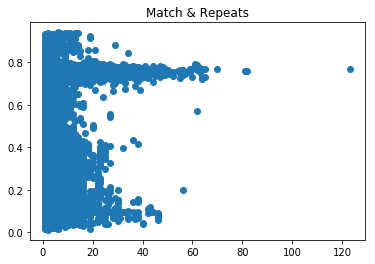

In [86]:
plt.title('Match & Repeats')
plt.plot(bbn['repeats'], bbn['match'], 'o')
plt.show()

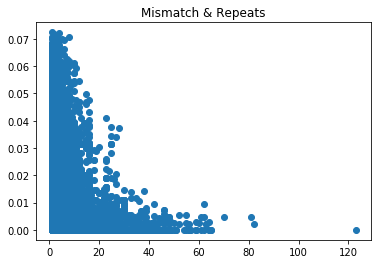

In [87]:
plt.title('Mismatch & Repeats')
plt.plot(bbn['repeats'], bbn['mismatch'], 'o')
plt.show()

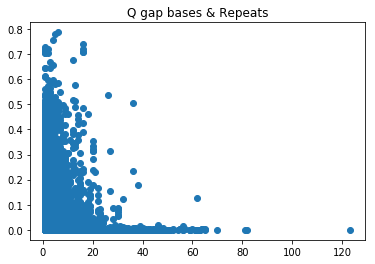

In [88]:
plt.title('Q gap bases & Repeats')
plt.plot(bbn['repeats'], bbn['Q gap bases'], 'o')
plt.show()

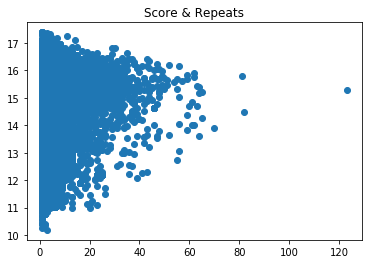

In [89]:
plt.title('Score & Repeats')
plt.plot(bbn['repeats'], bbn['score'], 'o')
plt.show()